# 

# Machine Project



- **HERNANDEZ**, Tedrick James B.
- **MAGLAQUE**, Jose III
- **NARVAEZ**, Jose Wilfredo

# Introduction to Datasets

### List of Python Libraries used in this Notebook

- pandas
- numpy
- sklearn 
- sklearn.naive_bayes 
- sklearn.linear_model 
- sklearn.neighbors 
- sklearn.metrics 
- sklearn.tree 
- sklearn.ensemble 
- sklearn.model_selection 
- sklearn.model_selection 
- sklearn.linear_model 

## Overview

For this project, we explored the **NBA games data** dataset series from [*Kaggle*](https://www.kaggle.com/datasets/nathanlauga/nba-games). This is a group of **five (5) data sets** collated by Nathan Lauga, derived from the official NBA website.

The data sets primarily contain **data about professional games played in the National Basketball Association (NBA) from 2004 to 2021**. Some of these data include **team data**, **player data**, **performance data** (such as points scored), and the like.

The five (5) data sets are as follows:

1. `games.csv` - contains game data like **dates**, **teams**, **number of points**, etc
2. `games_details.csv` - contains more specific game data such as **performance metrics** per player
3. `players.csv` - contains player details such as **name**, **year played**, etc.
4. `ranking.csv` - contains ranking data such as **placements of NBA teams in a particular day**, etc.
5. `teams.csv` - contains team data such as **team names**, **founding dates**, **team nicknames**, etc.

We set aside the `players.csv`, `ranking.csv`, and `teams.csv` data sets as they are not going to be used by the model for learning.

## Rationale

Using `games.csv`, `games_details.csv`, and `players.csv`, we intend to closely examine the manner by which **Most Valuable Player (MVP)** nominations are made. In summary, specifically, we would like to investigate if a machine learning model can make **accurate MVP nominations** based on various handlings of given statistics per player per season.

The **NBA Most Valuable Player (MVP) Award** is an annual award given to the "best player" of a given NBA season. The awardee is chosen by a panel of judges who are asked to rank their individual "best player" picks from ranks 1 to 5. Each given rank placement has a corresponding number of points. The award is given to the player who accumulated the most number of points.

Each rank placement vote has a corresponding number of points:

- **Rank 1 / 1st Place:** 10 points
- **Rank 2 / 2nd Place:** 7 points
- **Rank 3 / 3rd Place:** 5 points
- **Rank 4 / 4th Place:** 3 points
- **Rank 5 / 5th Place:** 1 point

A player who has incurred **at least one (1) MVP point** is considered an **MVP nominee**.

The judging panel is composed of a series of **sportswriters** and **broadcasters** all across the U.S. and Canada, hand-picked by the NBA. The manner of vote-casting is not held to certain rubrics or rigid guidelines; most are accomplished up to the judges' individual evaluations.

Our model aspires to predict if a given player is going to be an **MVP nominee**, wherein they will have **at least one (1) MVP point**, given their present statistics in a given period during the season. This model explores the relationship between a **player's performance metrics** and their **likelihood of becoming nominated for the MVP award**.

# Preprocessing

There are a number of adjustments and manipulations required to prime our data sets for machine learning.

## Loading of File to DataFrame

First, let's load `games_details.csv` and `games.csv` as data frames.

In [ ]:
# Loading of Data
import pandas as pd
gamedetails_df = pd.read_csv('games_details.csv')
games_df = pd.read_csv('games.csv')

print(games_df.head().to_string()) 
print(gamedetails_df.head().to_string()) 

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS
0    2022-03-12  22101005            Final    1610612748       1610612750    2021    1610612748     104.0        0.398        0.760         0.333      23.0      53.0    1610612750     113.0        0.422        0.875         0.357      21.0      46.0               0
1    2022-03-12  22101006            Final    1610612741       1610612739    2021    1610612741     101.0        0.443        0.933         0.429      20.0      46.0    1610612739      91.0        0.419   

Here we reinitialize the dataframes so that they only contain the features we will need for learning. The variables that we dropped are not needed or won't help our model at all.

In [ ]:
games_df = games_df[["GAME_ID", "SEASON"]]
gamedetails_df = gamedetails_df[["GAME_ID", "PLAYER_NAME", "MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]]

print(games_df.head().to_string()) 
print(gamedetails_df.head().to_string()) 


    GAME_ID  SEASON
0  22101005    2021
1  22101006    2021
2  22101007    2021
3  22101008    2021
4  22101009    2021
    GAME_ID         PLAYER_NAME    MIN  FGM  FG_PCT  FG3M  FG3A  FTM  FTA  FT_PCT  OREB  DREB   REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS
0  22101005     Anthony Edwards  36:22  4.0   0.400   3.0   8.0  4.0  4.0    1.00   0.0   8.0   8.0  5.0  3.0  1.0  1.0  1.0  15.0         5.0
1  22101005     Jaden McDaniels  23:54  6.0   0.750   1.0   3.0  1.0  1.0    1.00   2.0   4.0   6.0  0.0  0.0  2.0  2.0  6.0  14.0        10.0
2  22101005  Karl-Anthony Towns  25:17  4.0   0.444   1.0   3.0  6.0  8.0    0.75   1.0   9.0  10.0  0.0  0.0  0.0  3.0  4.0  15.0        14.0
3  22101005       Malik Beasley  30:52  4.0   0.444   4.0   9.0  0.0  0.0    0.00   0.0   3.0   3.0  1.0  1.0  0.0  1.0  4.0  12.0        20.0
4  22101005    D'Angelo Russell  33:46  3.0   0.231   1.0   6.0  7.0  7.0    1.00   0.0   6.0   6.0  9.0  1.0  0.0  5.0  0.0  14.0        17.0


## Merge dataframes by GAME_ID

Then, for further use, we tidy things up further by merging the data frames by `GAME_ID`. We merge the two datasets so that we know what season that specific game was done in.

In [ ]:
merged = pd.merge(games_df, gamedetails_df, how='inner')
merged['PLAYER_NAME'] = merged['PLAYER_NAME'] + " " + merged['SEASON'].map(str)
merged['MIN'] = merged['MIN'].map(lambda x: (str(x).split(':')[0]))
merged['MIN'] = merged['MIN'].map(lambda x: float(x))
#print(merged.head().to_string())
#print(merged["SEASON"].unique())
print(merged['PLAYER_NAME'])

0            Anthony Edwards 2021
1            Jaden McDaniels 2021
2         Karl-Anthony Towns 2021
3              Malik Beasley 2021
4           D'Angelo Russell 2021
                   ...           
646880         Andre Dawkins 2014
646881       Justin Hamilton 2014
646882         Tyler Johnson 2014
646883        Josh McRoberts 2014
646884       Reggie Williams 2014
Name: PLAYER_NAME, Length: 646885, dtype: object


We drop rows that contain NA values because NA values won't be necessary for our learning.

In [ ]:
merged = merged.dropna()
merged = merged.dropna(axis=0)
print(merged.head())

    GAME_ID  SEASON              PLAYER_NAME   MIN  FGM  FG_PCT  FG3M  FG3A  \
0  22101005    2021     Anthony Edwards 2021  36.0  4.0   0.400   3.0   8.0   
1  22101005    2021     Jaden McDaniels 2021  23.0  6.0   0.750   1.0   3.0   
2  22101005    2021  Karl-Anthony Towns 2021  25.0  4.0   0.444   1.0   3.0   
3  22101005    2021       Malik Beasley 2021  30.0  4.0   0.444   4.0   9.0   
4  22101005    2021    D'Angelo Russell 2021  33.0  3.0   0.231   1.0   6.0   

   FTM  FTA  ...  OREB  DREB   REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0  4.0  4.0  ...   0.0   8.0   8.0  5.0  3.0  1.0  1.0  1.0  15.0         5.0  
1  1.0  1.0  ...   2.0   4.0   6.0  0.0  0.0  2.0  2.0  6.0  14.0        10.0  
2  6.0  8.0  ...   1.0   9.0  10.0  0.0  0.0  0.0  3.0  4.0  15.0        14.0  
3  0.0  0.0  ...   0.0   3.0   3.0  1.0  1.0  0.0  1.0  4.0  12.0        20.0  
4  7.0  7.0  ...   0.0   6.0   6.0  9.0  1.0  0.0  5.0  0.0  14.0        17.0  

[5 rows x 21 columns]


## Split dataframes by SEASON

Since the award is given per season, it is important that we delimit to seasons as well.

In [ ]:
twentyone = merged.loc[merged['SEASON'] == 2021]
twenty = merged.loc[merged['SEASON'] == 2020]
nineteen = merged.loc[merged['SEASON'] == 2019]
thirteen = merged.loc[merged['SEASON'] == 2013]
eleven = merged.loc[merged['SEASON'] == 2011]
ten = merged.loc[merged['SEASON'] == 2010]
nine = merged.loc[merged['SEASON'] == 2009]
eight = merged.loc[merged['SEASON'] == 2008]
seven = merged.loc[merged['SEASON'] == 2007]
six = merged.loc[merged['SEASON'] == 2006]
five = merged.loc[merged['SEASON'] == 2005]
four = merged.loc[merged['SEASON'] == 2004]
three = merged.loc[merged['SEASON'] == 2003]
eighteen = merged.loc[merged['SEASON'] == 2018]
seventeen = merged.loc[merged['SEASON'] == 2017]
sixteen = merged.loc[merged['SEASON'] == 2016]
fifteen = merged.loc[merged['SEASON'] == 2015]
fourteen = merged.loc[merged['SEASON'] == 2014]
twelve = merged.loc[merged['SEASON'] == 2012]

twentyone


,GAME_ID,SEASON,PLAYER_NAME,MIN,FGM,FG_PCT,FG3M,FG3A,FTM,FTA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,2021,Anthony Edwards 2021,36.0,4.0,0.400,3.0,8.0,4.0,4.0,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,2021,Jaden McDaniels 2021,23.0,6.0,0.750,1.0,3.0,1.0,1.0,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,2021,Karl-Anthony Towns 2021,25.0,4.0,0.444,1.0,3.0,6.0,8.0,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,2021,Malik Beasley 2021,30.0,4.0,0.444,4.0,9.0,0.0,0.0,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,2021,D'Angelo Russell 2021,33.0,3.0,0.231,1.0,6.0,7.0,7.0,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28311,12100001,2021,Joel Ayayi 2021,13.0,0.0,0.000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,-15.0
28312,12100001,2021,Chaundee Brown Jr. 2021,13.0,4.0,0.500,2.0,4.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,10.0,-18.0
28313,12100001,2021,Cameron Oliver 2021,12.0,1.0,1.000,0.0,0.0,2.0,4.0,...,2.0,0.0,2.0,0.0,1.0,0.0,1.0,3.0,4.0,-22.0
28314,12100001,2021,Mac McClung 2021,9.0,0.0,0.000,0.0,2.0,1.0,2.0,...,0.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,-16.0


# Feature Engineering

We have identified a variety of crucial features that can be extracted from our data. We do these in the following processes below.

## Averaging scores per SEASON

Here we get the mean scores of each feature for each player in a season. The group considered using sums, however, not all the players played the same number of games as other players which would result in a big gap of values even if the aforementioned player played well. The use of the mean would help capture the average overall performace of a player in a season.

In [ ]:

twentyone = twentyone.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
twenty = twenty.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
nineteen = nineteen.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
thirteen = thirteen.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
eleven = eleven.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
ten = ten.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
nine = nine.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
eight = eight.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
seven = seven.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
six = six.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
five = five.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
four = four.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
three = three.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
eighteen = eighteen.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
seventeen = seventeen.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
sixteen = sixteen.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
fifteen = fifteen.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
fourteen = fourteen.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();
twelve = twelve.groupby("PLAYER_NAME")[["MIN", "FGM", "FG_PCT", "FG3M", "FG3A","FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TO", "PF", "PTS", "PLUS_MINUS"]].mean();

twentyone

,MIN,FGM,FG_PCT,FG3M,FG3A,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
PLAYER_NAME,,,,,,,,,,,,,,,,,,
A.J. Lawson 2021,6.000000,2.000000,0.667000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,-6.000000
Aamir Simms 2021,6.500000,0.500000,0.500000,0.000000,0.000000,1.000000,1.000000,0.500000,1.500000,1.000000,2.500000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
Aaron Gordon 2021,30.727273,5.393939,0.507061,1.090909,3.469697,2.257576,3.075758,0.572000,1.560606,4.060606,5.621212,2.530303,0.636364,0.530303,1.666667,1.924242,14.136364,4.393939
Aaron Henry 2021,6.300000,0.500000,0.143300,0.100000,0.500000,0.100000,0.100000,0.100000,0.100000,0.600000,0.700000,0.400000,0.700000,0.300000,0.500000,0.700000,1.200000,-1.900000
Aaron Holiday 2021,15.928571,2.607143,0.486196,0.642857,1.642857,0.875000,1.053571,0.315464,0.303571,1.589286,1.892857,2.285714,0.607143,0.160714,1.089286,1.446429,6.732143,-1.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins 2021,15.500000,2.071429,0.450571,0.500000,1.142857,1.357143,1.642857,0.428571,1.857143,3.071429,4.928571,1.785714,0.428571,0.571429,1.571429,2.357143,6.000000,0.071429
Zach LaVine 2021,33.896552,8.655172,0.479603,2.827586,7.034483,4.293103,4.982759,0.760569,0.310345,4.500000,4.810345,4.396552,0.637931,0.362069,2.758621,1.793103,24.431034,2.551724
Zeke Nnaji 2021,16.022222,2.266667,0.512222,0.888889,1.822222,0.866667,1.422222,0.338867,1.333333,2.311111,3.644444,0.422222,0.377778,0.333333,0.600000,1.822222,6.288889,-1.022222


## Add ground truth labels

Let’s set the ground truths first for each year.

In [ ]:
twentyone['isNominated'] = False
twenty['isNominated'] = False
nineteen['isNominated'] = False
thirteen['isNominated'] = False
eleven['isNominated'] = False
ten['isNominated'] = False
nine['isNominated'] = False
eight['isNominated'] = False
seven['isNominated'] = False
six['isNominated'] = False
five['isNominated'] = False
four['isNominated'] = False
three['isNominated'] = False
eighteen['isNominated'] = False
seventeen['isNominated'] = False
sixteen['isNominated'] = False
fifteen['isNominated'] = False
fourteen['isNominated'] = False
twelve['isNominated'] = False

seventeen



,MIN,FGM,FG_PCT,FG3M,FG3A,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,isNominated
PLAYER_NAME,,,,,,,,,,,,,,,,,,,
Aaron Brooks 2017,5.500000,0.861111,0.315806,0.305556,1.000000,0.277778,0.416667,0.129639,0.194444,0.277778,0.472222,0.694444,0.166667,0.000000,0.333333,0.861111,2.305556,-2.166667,False
Aaron Gordon 2017,31.666667,6.539683,0.442746,1.968254,5.761905,2.634921,3.809524,0.554603,1.523810,6.317460,7.841270,2.206349,0.968254,0.746032,1.793651,1.888889,17.682540,-1.301587,False
Aaron Harrison 2017,25.222222,2.111111,0.255000,1.000000,4.777778,1.444444,1.888889,0.453778,0.444444,2.222222,2.666667,1.222222,1.000000,0.222222,0.333333,3.000000,6.666667,-8.000000,False
Aaron Jackson 2017,5.875000,0.625000,0.125000,0.125000,0.750000,0.250000,0.500000,0.125000,0.500000,0.375000,0.875000,0.375000,0.000000,0.000000,0.375000,0.750000,1.625000,-2.125000,False
Abdel Nader 2017,9.317460,1.063492,0.245159,0.412698,1.253968,0.476190,0.777778,0.161381,0.269841,1.031746,1.301587,0.523810,0.269841,0.190476,0.650794,0.841270,3.015873,-1.793651,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins 2017,15.813333,1.853333,0.360240,0.533333,1.773333,0.560000,0.866667,0.227787,0.746667,2.666667,3.413333,0.826667,0.266667,0.466667,0.880000,2.093333,4.800000,0.160000,False
Zach LaVine 2017,26.916667,5.666667,0.376625,1.750000,5.125000,3.625000,4.458333,0.785167,0.375000,3.541667,3.916667,3.000000,1.000000,0.166667,1.791667,2.291667,16.708333,-7.166667,False
Zach Randolph 2017,24.822581,6.064516,0.458419,0.903226,2.564516,1.387097,1.790323,0.507387,1.580645,5.000000,6.580645,2.096774,0.677419,0.193548,1.919355,2.000000,14.419355,-5.806452,False


After the ground truths have been encoded, it is time to encode the **actual nominees for the MVP award** of each season from 2004 to 2021 based on the nominated list retrieved from the [NBA MVP List](https://www.basketball-reference.com/awards/mvp.html).

In [ ]:
twentyone.loc['Stephen Curry 2021', ['isNominated']] = True
twentyone.loc['Joel Embiid 2021', ['isNominated']] = True
twentyone.loc['Nikola Jokic 2021', ['isNominated']] = True
twentyone.loc['Giannis Antetokounmpo 2021', ['isNominated']] = True
twentyone.loc['Chris Paul 2021', ['isNominated']] = True
twentyone.loc['Luka Doncic 2021', ['isNominated']] = True
twentyone.loc['Damian Lillard 2021', ['isNominated']] = True
twentyone.loc['Julius Randle 2021', ['isNominated']] = True
twentyone.loc['Derrick Rose 2021', ['isNominated']] = True
twentyone.loc['Rudy Gobert 2021', ['isNominated']] = True
twentyone.loc['Russell Westbrook 2021', ['isNominated']] = True
twentyone.loc['James Harden 2021', ['isNominated']] = True
twentyone.loc['LeBron James 2021', ['isNominated']] = True
print(twentyone.loc['Stephen Curry 2021'])
print(twentyone.loc['Joel Embiid 2021'])
print(twentyone.loc['Nikola Jokic 2021'])

twenty.loc['LeBron James 2020', ['isNominated']] = True
twenty.loc['Giannis Antetokounmpo 2020', ['isNominated']] = True
twenty.loc['James Harden 2020', ['isNominated']] = True
twenty.loc['Luka Doncic 2020', ['isNominated']] = True
twenty.loc['Kawhi Leonard 2020', ['isNominated']] = True
twenty.loc['Anthony Davis 2020', ['isNominated']] = True
twenty.loc['Chris Paul 2020', ['isNominated']] = True
twenty.loc['Damian Lillard 2020', ['isNominated']] = True
twenty.loc['Nikola Jokic 2020', ['isNominated']] = True
twenty.loc['Pascal Siakam 2020', ['isNominated']] = True
twenty.loc['Jimmy Butler 2020', ['isNominated']] = True
twenty.loc['Jayson Tatum 2020', ['isNominated']] = True
print("twenty", twenty.loc['LeBron James 2020'])
print("twenty", twenty.loc['Giannis Antetokounmpo 2020'])
print("twenty", twenty.loc['James Harden 2020'])

nineteen.loc['Giannis Antetokounmpo 2019', ['isNominated']] = True
nineteen.loc['James Harden 2019', ['isNominated']] = True
nineteen.loc['Paul George 2019', ['isNominated']] = True
nineteen.loc['Nikola Jokic 2019', ['isNominated']] = True
nineteen.loc['Stephen Curry 2019', ['isNominated']] = True
nineteen.loc['Damian Lillard 2019', ['isNominated']] = True
nineteen.loc['Joel Embiid 2019', ['isNominated']] = True
nineteen.loc['Kawhi Leonard 2019', ['isNominated']] = True
nineteen.loc['Russell Westbrook 2019', ['isNominated']] = True
nineteen.loc['Rudy Gobert 2019', ['isNominated']] = True
nineteen.loc['LeBron James 2019', ['isNominated']] = True
print(nineteen.loc['Giannis Antetokounmpo 2019'])
print(nineteen.loc['James Harden 2019'])
print(nineteen.loc['Paul George 2019'])

eighteen.loc['LeBron James 2018', ['isNominated']] = True
eighteen.loc['Anthony Davis 2018', ['isNominated']] = True
eighteen.loc['James Harden 2018', ['isNominated']] = True
eighteen.loc['Damian Lillard 2018', ['isNominated']] = True
eighteen.loc['Russell Westbrook 2018', ['isNominated']] = True
eighteen.loc['Giannis Antetokounmpo 2018', ['isNominated']] = True
eighteen.loc['Kevin Durant 2018', ['isNominated']] = True
eighteen.loc['DeMar DeRozan 2018', ['isNominated']] = True
eighteen.loc['LaMarcus Aldridge 2018', ['isNominated']] = True
eighteen.loc['Jimmy Butler 2018', ['isNominated']] = True
eighteen.loc['Stephen Curry 2018', ['isNominated']] = True
eighteen.loc['Joel Embiid 2018', ['isNominated']] = True
eighteen.loc['Victor Oladipo 2018', ['isNominated']] = True
print(eighteen.loc['LeBron James 2018'])
print(eighteen.loc['Anthony Davis 2018'])
print(eighteen.loc['James Harden 2018'])

seventeen.loc['Russell Westbrook 2017', ['isNominated']] = True
seventeen.loc['James Harden 2017', ['isNominated']] = True
seventeen.loc['Kawhi Leonard 2017', ['isNominated']] = True
seventeen.loc['LeBron James 2017', ['isNominated']] = True
seventeen.loc['Isaiah Thomas 2017', ['isNominated']] = True
seventeen.loc['Stephen Curry 2017', ['isNominated']] = True
seventeen.loc['Giannis Antetokounmpo 2017', ['isNominated']] = True
seventeen.loc['John Wall 2017', ['isNominated']] = True
seventeen.loc['Anthony Davis 2017', ['isNominated']] = True
seventeen.loc['Kevin Durant 2017', ['isNominated']] = True
seventeen.loc['DeMar DeRozan 2017', ['isNominated']] = True
print(seventeen.loc['Russell Westbrook 2017'])
print(seventeen.loc['James Harden 2017'])
print(seventeen.loc['Kawhi Leonard 2017'])

sixteen.loc['Stephen Curry 2016', ['isNominated']] = True
sixteen.loc['Kawhi Leonard 2016', ['isNominated']] = True
sixteen.loc['LeBron James 2016', ['isNominated']] = True
sixteen.loc['Russell Westbrook 2016', ['isNominated']] = True
sixteen.loc['Kevin Durant 2016', ['isNominated']] = True
sixteen.loc['Chris Paul 2016', ['isNominated']] = True
sixteen.loc['Draymond Green 2016', ['isNominated']] = True
sixteen.loc['Damian Lillard 2016', ['isNominated']] = True
sixteen.loc['James Harden 2016', ['isNominated']] = True
sixteen.loc['Kyle Lowry 2016', ['isNominated']] = True
print(sixteen.loc['Stephen Curry 2016'])
print(sixteen.loc['Kawhi Leonard 2016'])
print(sixteen.loc['LeBron James 2016'])

fifteen.loc['Stephen Curry 2015', ['isNominated']] = True
fifteen.loc['James Harden 2015', ['isNominated']] = True
fifteen.loc['LeBron James 2015', ['isNominated']] = True
fifteen.loc['Russell Westbrook 2015', ['isNominated']] = True
fifteen.loc['Anthony Davis 2015', ['isNominated']] = True
fifteen.loc['Chris Paul 2015', ['isNominated']] = True
fifteen.loc['LaMarcus Aldridge 2015', ['isNominated']] = True
fifteen.loc['Marc Gasol 2015', ['isNominated']] = True
fifteen.loc['Blake Griffin 2015', ['isNominated']] = True
fifteen.loc['Tim Duncan 2015', ['isNominated']] = True
fifteen.loc['Kawhi Leonard 2015', ['isNominated']] = True
fifteen.loc['Klay Thompson 2015', ['isNominated']] = True
print(fifteen.loc['Stephen Curry 2015'])
print(fifteen.loc['James Harden 2015'])
print(fifteen.loc['LeBron James 2015'])

fourteen.loc['Kevin Durant 2014', ['isNominated']] = True
fourteen.loc['LeBron James 2014', ['isNominated']] = True
fourteen.loc['Blake Griffin 2014', ['isNominated']] = True
fourteen.loc['Joakim Noah 2014', ['isNominated']] = True
fourteen.loc['James Harden 2014', ['isNominated']] = True
fourteen.loc['Stephen Curry 2014', ['isNominated']] = True
fourteen.loc['Chris Paul 2014', ['isNominated']] = True
fourteen.loc['Al Jefferson 2014', ['isNominated']] = True
fourteen.loc['Paul George 2014', ['isNominated']] = True
fourteen.loc['LaMarcus Aldridge 2014', ['isNominated']] = True
fourteen.loc['Tim Duncan 2014', ['isNominated']] = True
fourteen.loc['Tony Parker 2014', ['isNominated']] = True
fourteen.loc['Dirk Nowitzki 2014', ['isNominated']] = True
fourteen.loc['Carmelo Anthony 2014', ['isNominated']] = True
fourteen.loc['Goran Dragic 2014', ['isNominated']] = True
fourteen.loc['Mike Conley 2014', ['isNominated']] = True
print(fourteen.loc['Kevin Durant 2014'])
print(fourteen.loc['LeBron James 2014'])
print(fourteen.loc['Blake Griffin 2014'])

thirteen.loc['LeBron James 2013', ['isNominated']] = True
thirteen.loc['Kevin Durant 2013', ['isNominated']] = True
thirteen.loc['Carmelo Anthony 2013', ['isNominated']] = True
thirteen.loc['Chris Paul 2013', ['isNominated']] = True
thirteen.loc['Kobe Bryant 2013', ['isNominated']] = True
thirteen.loc['Tony Parker 2013', ['isNominated']] = True
thirteen.loc['Tim Duncan 2013', ['isNominated']] = True
thirteen.loc['James Harden 2013', ['isNominated']] = True
thirteen.loc['Russell Westbrook 2013', ['isNominated']] = True
thirteen.loc['Dwyane Wade 2013', ['isNominated']] = True
thirteen.loc['Stephen Curry 2013', ['isNominated']] = True
thirteen.loc['Kevin Garnett 2013', ['isNominated']] = True
thirteen.loc['Marc Gasol 2013', ['isNominated']] = True
thirteen.loc['David Lee 2013', ['isNominated']] = True
thirteen.loc['Joakim Noah 2013', ['isNominated']] = True
print(thirteen.loc['LeBron James 2013'])
print(thirteen.loc['Kevin Durant 2013'])
print(thirteen.loc['Carmelo Anthony 2013'])

twelve.loc['LeBron James 2012', ['isNominated']] = True
twelve.loc['Kevin Durant 2012', ['isNominated']] = True
twelve.loc['Chris Paul 2012', ['isNominated']] = True
twelve.loc['Kobe Bryant 2012', ['isNominated']] = True
twelve.loc['Tony Parker 2012', ['isNominated']] = True
twelve.loc['Kevin Love 2012', ['isNominated']] = True
twelve.loc['Dwight Howard 2012', ['isNominated']] = True
twelve.loc['Rajon Rondo 2012', ['isNominated']] = True
twelve.loc['Steve Nash 2012', ['isNominated']] = True
twelve.loc['Dwyane Wade 2012', ['isNominated']] = True
twelve.loc['Dirk Nowitzki 2012', ['isNominated']] = True
twelve.loc['Russell Westbrook 2012', ['isNominated']] = True
twelve.loc['Tim Duncan 2012', ['isNominated']] = True
twelve.loc['Joe Johnson 2012', ['isNominated']] = True
print(twelve.loc['LeBron James 2012'])
print(twelve.loc['Kevin Durant 2012'])
print(twelve.loc['Chris Paul 2012'])

eleven.loc['Derrick Rose 2011', ['isNominated']] = True
eleven.loc['Dwight Howard 2011', ['isNominated']] = True
eleven.loc['LeBron James 2011', ['isNominated']] = True
eleven.loc['Kobe Bryant 2011', ['isNominated']] = True
eleven.loc['Kevin Durant 2011', ['isNominated']] = True
eleven.loc['Dirk Nowitzki 2011', ['isNominated']] = True
eleven.loc['Dwyane Wade 2011', ['isNominated']] = True
eleven.loc['Manu Ginobili 2011', ['isNominated']] = True
eleven.loc["Amar'e Stoudemire 2011", ['isNominated']] = True
eleven.loc['Blake Griffin 2011', ['isNominated']] = True
eleven.loc['Rajon Rondo 2011', ['isNominated']] = True
eleven.loc['Tony Parker 2011', ['isNominated']] = True
eleven.loc['Chris Paul 2011', ['isNominated']] = True
print(eleven.loc['Derrick Rose 2011'])
print(eleven.loc['Dwight Howard 2011'])
print(eleven.loc['LeBron James 2011'])

ten.loc['LeBron James 2010', ['isNominated']] = True
ten.loc['Kevin Durant 2010', ['isNominated']] = True
ten.loc['Kobe Bryant 2010', ['isNominated']] = True
ten.loc['Dwight Howard 2010', ['isNominated']] = True
ten.loc['Dwyane Wade 2010', ['isNominated']] = True
ten.loc['Carmelo Anthony 2010', ['isNominated']] = True
ten.loc['Dirk Nowitzki 2010', ['isNominated']] = True
ten.loc['Steve Nash 2010', ['isNominated']] = True
ten.loc['Deron Williams 2010', ['isNominated']] = True
ten.loc["Amar'e Stoudemire 2010", ['isNominated']] = True
ten.loc['Manu Ginobili 2010', ['isNominated']] = True
ten.loc['Chauncey Billups 2010', ['isNominated']] = True
ten.loc['Chris Bosh 2010', ['isNominated']] = True
ten.loc['Stephen Jackson 2010', ['isNominated']] = True
ten.loc['Joe Johnson 2010', ['isNominated']] = True
print(ten.loc['LeBron James 2010'])
print(ten.loc['Kevin Durant 2010'])
print(ten.loc['Kobe Bryant 2010'])

nine.loc['LeBron James 2009', ['isNominated']] = True
nine.loc['Kobe Bryant 2009', ['isNominated']] = True
nine.loc['Dwyane Wade 2009', ['isNominated']] = True
nine.loc['Dwight Howard 2009', ['isNominated']] = True
nine.loc['Chris Paul 2009', ['isNominated']] = True
nine.loc['Chauncey Billups 2009', ['isNominated']] = True
nine.loc['Paul Pierce 2009', ['isNominated']] = True
nine.loc['Tony Parker 2009', ['isNominated']] = True
nine.loc['Brandon Roy 2009', ['isNominated']] = True
nine.loc['Dirk Nowitzki 2009', ['isNominated']] = True
nine.loc['Tim Duncan 2009', ['isNominated']] = True
print(nine.loc['LeBron James 2009'])
print(nine.loc['Kobe Bryant 2009'])
print(nine.loc['Dwyane Wade 2009'])

eight.loc['Kobe Bryant 2008', ['isNominated']] = True
eight.loc['Chris Paul 2008', ['isNominated']] = True
eight.loc['Kevin Garnett 2008', ['isNominated']] = True
eight.loc['LeBron James 2008', ['isNominated']] = True
eight.loc['Dwight Howard 2008', ['isNominated']] = True
eight.loc["Amar'e Stoudemire 2008", ['isNominated']] = True
eight.loc['Tim Duncan 2008', ['isNominated']] = True
eight.loc['Tracy McGrady 2008', ['isNominated']] = True
eight.loc['Steve Nash 2008', ['isNominated']] = True
eight.loc['Manu Ginobili 2008', ['isNominated']] = True
eight.loc['Dirk Nowitzki 2008', ['isNominated']] = True
eight.loc['Deron Williams 2008', ['isNominated']] = True
eight.loc['Carmelo Anthony 2008', ['isNominated']] = True
eight.loc['Carlos Boozer 2008', ['isNominated']] = True
eight.loc['Antawn Jamison 2008', ['isNominated']] = True
eight.loc['Paul Pierce 2008', ['isNominated']] = True
eight.loc['Rasheed Wallace 2008', ['isNominated']] = True
print(eight.loc['Kobe Bryant 2008'])
print(eight.loc['Chris Paul 2008'])
print(eight.loc['Kevin Garnett 2008'])

seven.loc['Dirk Nowitzki 2007', ['isNominated']] = True
seven.loc['Steve Nash 2007', ['isNominated']] = True
seven.loc['Kobe Bryant 2007', ['isNominated']] = True
seven.loc['Tim Duncan 2007', ['isNominated']] = True
seven.loc['LeBron James 2007', ['isNominated']] = True
seven.loc['Tracy McGrady 2007', ['isNominated']] = True
seven.loc['Chris Bosh 2007', ['isNominated']] = True
seven.loc['Gilbert Arenas 2007', ['isNominated']] = True
seven.loc['Carlos Boozer 2007', ['isNominated']] = True
seven.loc['Kevin Garnett 2007', ['isNominated']] = True
seven.loc['Chauncey Billups 2007', ['isNominated']] = True
seven.loc["Shaquille O'Neal 2007", ['isNominated']] = True
seven.loc['Dwyane Wade 2007', ['isNominated']] = True
seven.loc["Amar'e Stoudemire 2007", ['isNominated']] = True
seven.loc['Carmelo Anthony 2007', ['isNominated']] = True
seven.loc['Baron Davis 2007', ['isNominated']] = True
seven.loc['Tony Parker 2007', ['isNominated']] = True
print(seven.loc['Dirk Nowitzki 2007'])
print(seven.loc['Steve Nash 2007'])
print(seven.loc['Kobe Bryant 2007'])

six.loc['Dirk Nowitzki 2006', ['isNominated']] = True
six.loc['Steve Nash 2006', ['isNominated']] = True
six.loc['LeBron James 2006', ['isNominated']] = True
six.loc['Kobe Bryant 2006', ['isNominated']] = True
six.loc['Chauncey Billups 2006', ['isNominated']] = True
six.loc['Dwyane Wade 2006', ['isNominated']] = True
six.loc['Elton Brand 2006', ['isNominated']] = True
six.loc['Tim Duncan 2006', ['isNominated']] = True
six.loc['Tony Parker 2006', ['isNominated']] = True
six.loc['Allen Iverson 2006', ['isNominated']] = True
six.loc['Shawn Marion 2006', ['isNominated']] = True
print(six.loc['Dirk Nowitzki 2006'])
print(six.loc['Steve Nash 2006'])
print(six.loc['LeBron James 2006'])

five.loc['Dirk Nowitzki 2005', ['isNominated']] = True
five.loc['Steve Nash 2005', ['isNominated']] = True
five.loc["Shaquille O'Neal 2005", ['isNominated']] = True
five.loc['Tim Duncan 2005', ['isNominated']] = True
five.loc['Allen Iverson 2005', ['isNominated']] = True
five.loc['LeBron James 2005', ['isNominated']] = True
five.loc['Tracy McGrady 2005', ['isNominated']] = True
five.loc["Amar'e Stoudemire 2005", ['isNominated']] = True
five.loc['Ray Allen 2005', ['isNominated']] = True
five.loc['Kevin Garnett 2005', ['isNominated']] = True
five.loc['Gilbert Arenas 2005', ['isNominated']] = True
five.loc['Vince Carter 2005', ['isNominated']] = True
five.loc['Marcus Camby 2005', ['isNominated']] = True
five.loc['Shawn Marion 2005', ['isNominated']] = True
print(five.loc['Dirk Nowitzki 2005'])
print(five.loc['Steve Nash 2005'])
print(five.loc["Shaquille O'Neal 2005"])

four.loc['Kevin Garnett 2004', ['isNominated']] = True
four.loc['Tim Duncan 2004', ['isNominated']] = True
four.loc["Jermaine O'Neal 2004", ['isNominated']] = True
four.loc["Peja Stojakovic 2004", ['isNominated']] = True
four.loc["Kobe Bryant 2004", ['isNominated']] = True
four.loc["Shaquille O'Neal 2004", ['isNominated']] = True
four.loc["Ben Wallace 2004", ['isNominated']] = True
four.loc["Jason Kidd 2004", ['isNominated']] = True
four.loc["LeBron James 2004", ['isNominated']] = True
four.loc["Sam Cassell 2004", ['isNominated']] = True
four.loc["Baron Davis 2004", ['isNominated']] = True
four.loc["Dirk Nowitzki 2004", ['isNominated']] = True
four.loc["Andrei Kirilenko 2004", ['isNominated']] = True
four.loc["Carmelo Anthony 2004", ['isNominated']] = True
four.loc["Yao Ming 2004", ['isNominated']] = True
four.loc["Michael Redd 2004", ['isNominated']] = True
print(four.loc['Kevin Garnett 2004'])
print(four.loc['Tim Duncan 2004'])
print(four.loc["Jermaine O'Neal 2004"])

FGM            10.325843
FG_PCT          0.554573
FG3M             0.94382
FG3A             3.52809
FTM             6.134831
FTA             9.382022
FT_PCT          0.643899
OREB            1.831461
DREB            9.483146
REB            11.314607
AST             5.640449
STL             1.191011
BLK             1.146067
TO              3.247191
PF              2.786517
PTS            27.730337
PLUS_MINUS      6.775281
isNominated         True
Name: Giannis Antetokounmpo 2020, dtype: object
twenty MIN            35.438596
FGM             7.438596
FG_PCT          0.453561
FG3M            2.789474
FG3A            7.578947
FTM             6.263158
FTA             7.210526
FT_PCT          0.809211
OREB             0.77193
DREB            6.719298
REB             7.491228
AST            10.192982
STL             1.280702
BLK             0.701754
TO              3.894737
PF              2.245614
PTS            23.929825
PLUS_MINUS      3.140351
isNominated         True
Name: James Harden 2

In [ ]:
twentyone

,MIN,FGM,FG_PCT,FG3M,FG3A,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,isNominated
PLAYER_NAME,,,,,,,,,,,,,,,,,,,
A.J. Lawson 2021,6.000000,2.000000,0.667000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,-6.000000,False
Aamir Simms 2021,6.500000,0.500000,0.500000,0.000000,0.000000,1.000000,1.000000,0.500000,1.500000,1.000000,2.500000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,False
Aaron Gordon 2021,30.727273,5.393939,0.507061,1.090909,3.469697,2.257576,3.075758,0.572000,1.560606,4.060606,5.621212,2.530303,0.636364,0.530303,1.666667,1.924242,14.136364,4.393939,False
Aaron Henry 2021,6.300000,0.500000,0.143300,0.100000,0.500000,0.100000,0.100000,0.100000,0.100000,0.600000,0.700000,0.400000,0.700000,0.300000,0.500000,0.700000,1.200000,-1.900000,False
Aaron Holiday 2021,15.928571,2.607143,0.486196,0.642857,1.642857,0.875000,1.053571,0.315464,0.303571,1.589286,1.892857,2.285714,0.607143,0.160714,1.089286,1.446429,6.732143,-1.375000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins 2021,15.500000,2.071429,0.450571,0.500000,1.142857,1.357143,1.642857,0.428571,1.857143,3.071429,4.928571,1.785714,0.428571,0.571429,1.571429,2.357143,6.000000,0.071429,False
Zach LaVine 2021,33.896552,8.655172,0.479603,2.827586,7.034483,4.293103,4.982759,0.760569,0.310345,4.500000,4.810345,4.396552,0.637931,0.362069,2.758621,1.793103,24.431034,2.551724,False
Zeke Nnaji 2021,16.022222,2.266667,0.512222,0.888889,1.822222,0.866667,1.422222,0.338867,1.333333,2.311111,3.644444,0.422222,0.377778,0.333333,0.600000,1.822222,6.288889,-1.022222,False


# Exploratory Data Analysis

Before we can allow our model to encroach the data, we must understand our datasets first. A proper **exploration** and **analysis** of our data’s tendencies is a good way to grant ourselves a bird’s eye view of what we’re dealing with.

## Number of observations and variables

In [ ]:
twentyone.info()
twenty.info()
nineteen.info()
eighteen.info()
seventeen.info()
sixteen.info()
fifteen.info()
fourteen.info()
thirteen.info()
twelve.info()
eleven.info()
ten.info()
nine.info()
eight.info()
seven.info()
six.info()
five.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, A.J. Lawson 2021 to Zylan Cheatham 2021
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MIN          633 non-null    float64
 1   FGM          633 non-null    float64
 2   FG_PCT       633 non-null    float64
 3   FG3M         633 non-null    float64
 4   FG3A         633 non-null    float64
 5   FTM          633 non-null    float64
 6   FTA          633 non-null    float64
 7   FT_PCT       633 non-null    float64
 8   OREB         633 non-null    float64
 9   DREB         633 non-null    float64
 10  REB          633 non-null    float64
 11  AST          633 non-null    float64
 12  STL          633 non-null    float64
 13  BLK          633 non-null    float64
 14  TO           633 non-null    float64
 15  PF           633 non-null    float64
 16  PTS          633 non-null    float64
 17  PLUS_MINUS   633 non-null    float64
 18  isNominated  633 non-nul

### Number of Observations:

- `twentyone`: 633
- `twenty`: 585
- `nineteen`: 599
- `eighteen`: 599
- `seventeen`: 604
- `sixteen`; 571
- `fifteen`: 579
- `fourteen`: 556
- `thirteen`: 481
- `twelve`; 470
- `eleven`: 478
- `ten`: 452
- `nine`: 442
- `eight`: 444
- `seven`: 450
- `six`: 458
- `five`: 458

These are the number of registered players for each season.


### Variable Glossary

**ALL** dataframes have **19** variables

- `MIN`: Average number of minutes the player has played
- `FGM`: Average number of field goals made
- `FG3M`: Average number of three point field goals made
- `FG3A`: Average number of three point field goal attempts
- `FTM`: Average number of free throws made
- `FTA`: Average number of free throw attempts
- `OREB`: Average number of offensive rebounds
- `DREB`: Average number of defensive rebounds
- `TO`: Average number of turnovers
- `PF`: Average number of personal fouls
- `PLUS_MINUS`: Average impact of the player on each game
- `FG_PCT`: Average Field Goal Percentage of the player
- `FT_PCT`: Average Free Throw Percentage of the player
- `REB`: Average Rebounds of the player
- `AST`: Average Assists of the player
- `STL`: Average Steals of the player
- `BLK`: Average Blocks of the player
- `PTS`: Average Points of the player
- `isNominated`: If the player has been voted for MVP


In [ ]:
EDA = twentyone

### Box Plots of Each Variable

In here, we can visualize the **five-number summary** of each variable. We spotted a series of noteworthy outliers for some of the variables. We chose to do a box plot because we figured it was the best plot to represent our data. Because of the amount of players in our data other graphs won't be able to represent our dataset clearly.

<AxesSubplot:>

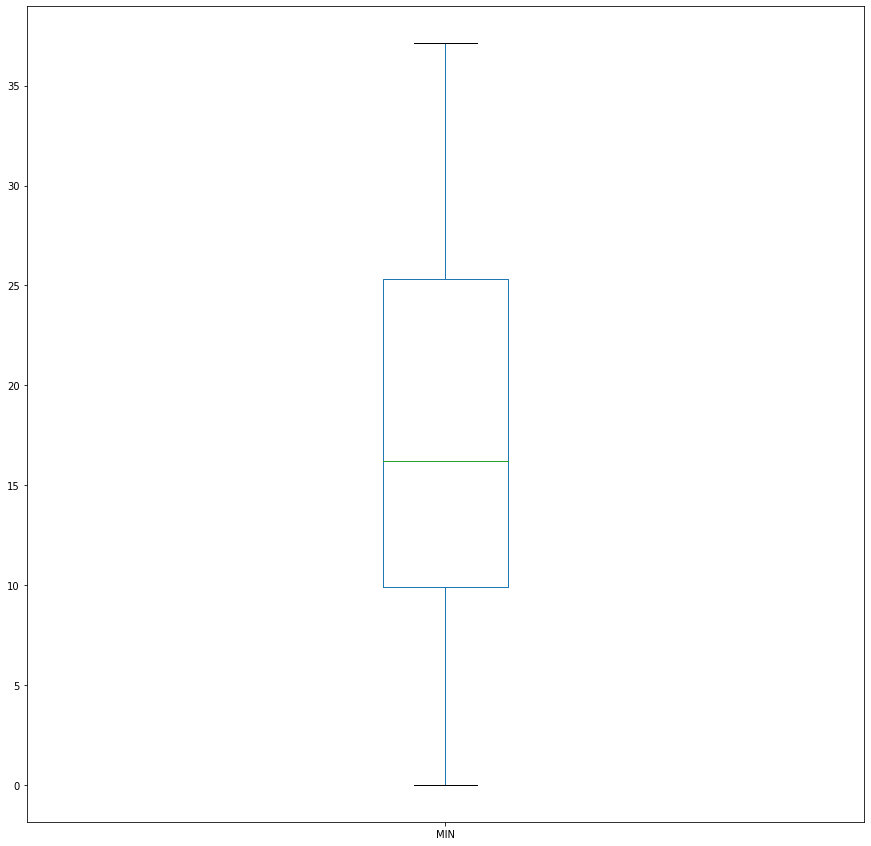

In [ ]:
EDA.plot.box(y = 'MIN', figsize = (15,15))

<AxesSubplot:>

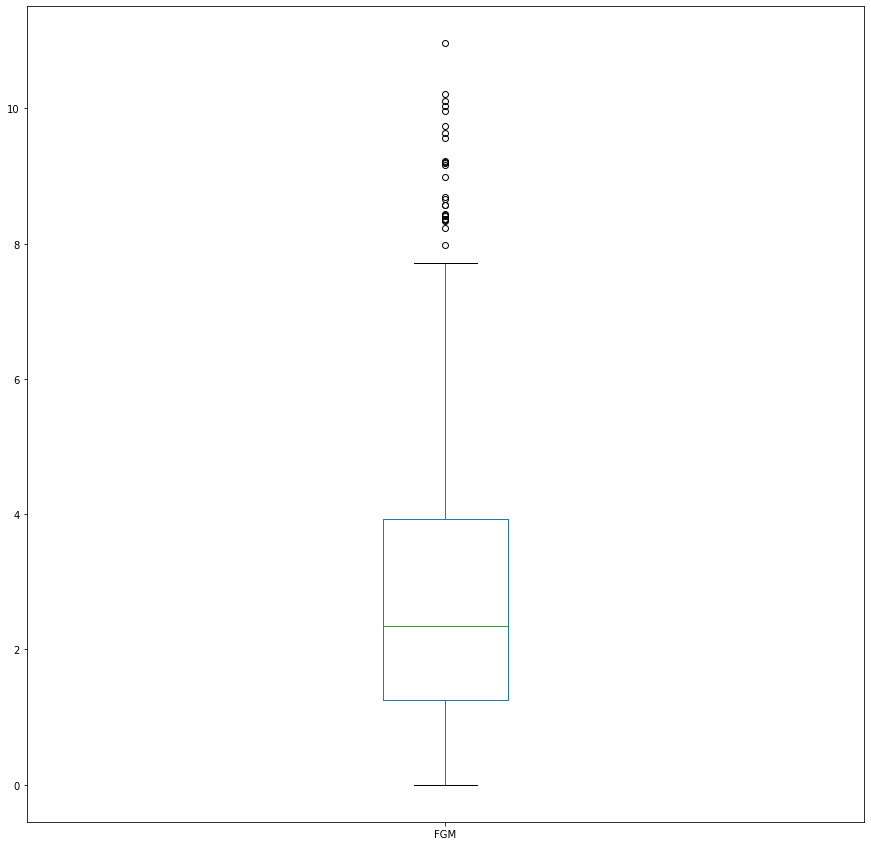

In [ ]:
EDA.plot.box(y = 'FGM', figsize = (15,15))

<AxesSubplot:>

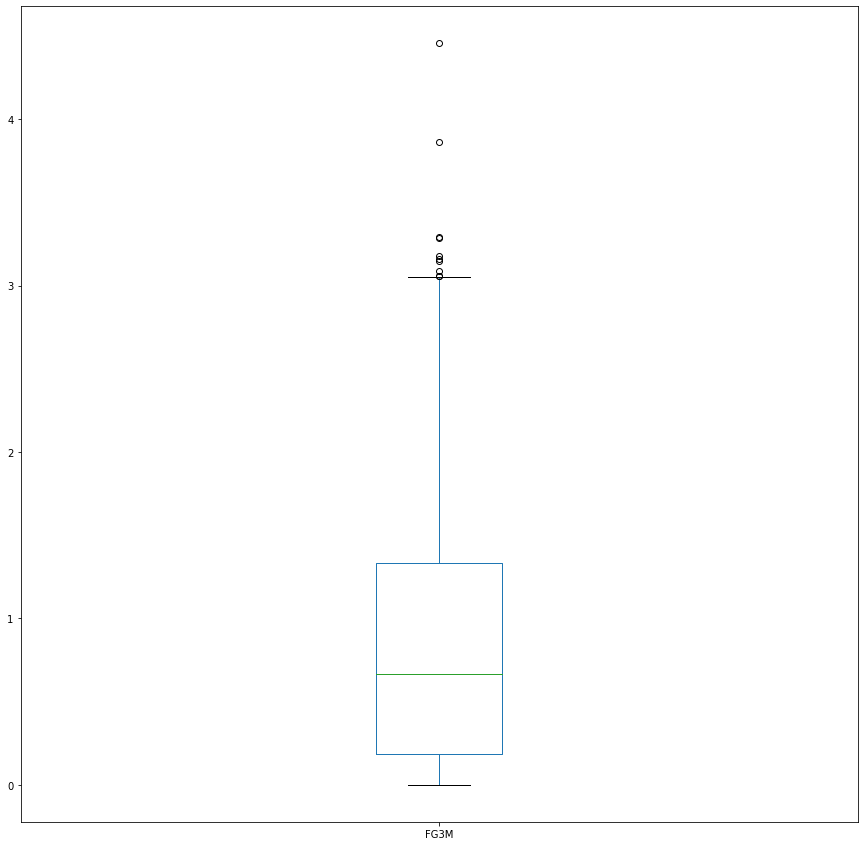

In [ ]:
EDA.plot.box(y = 'FG3M', figsize = (15,15))

<AxesSubplot:>

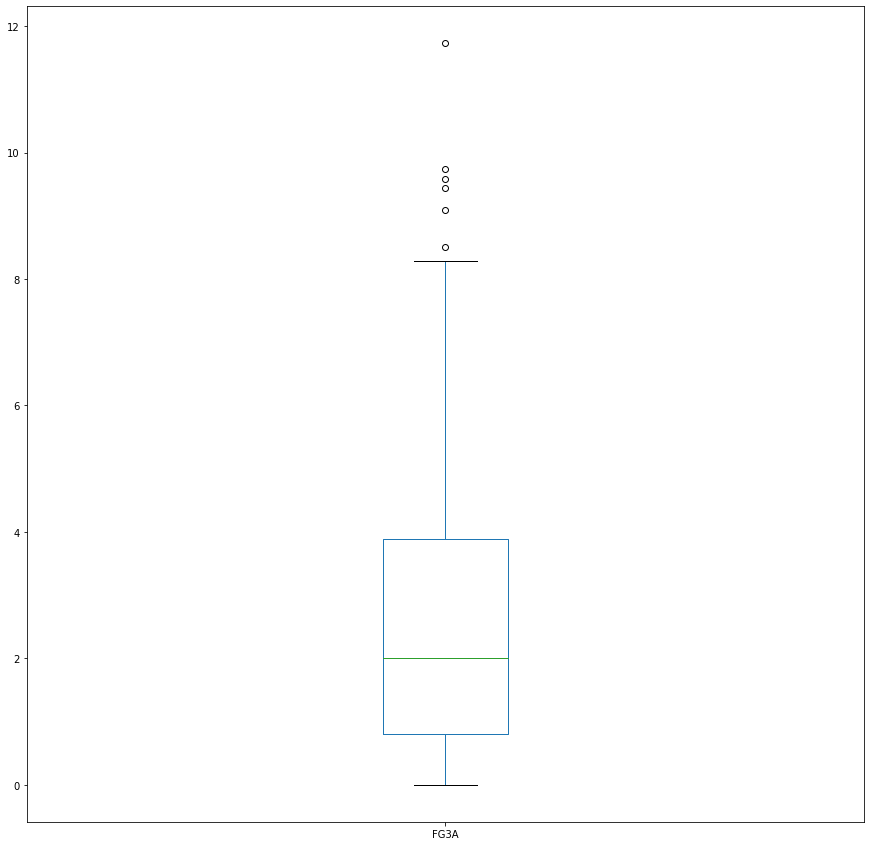

In [ ]:
EDA.plot.box(y = 'FG3A', figsize = (15,15))

<AxesSubplot:>

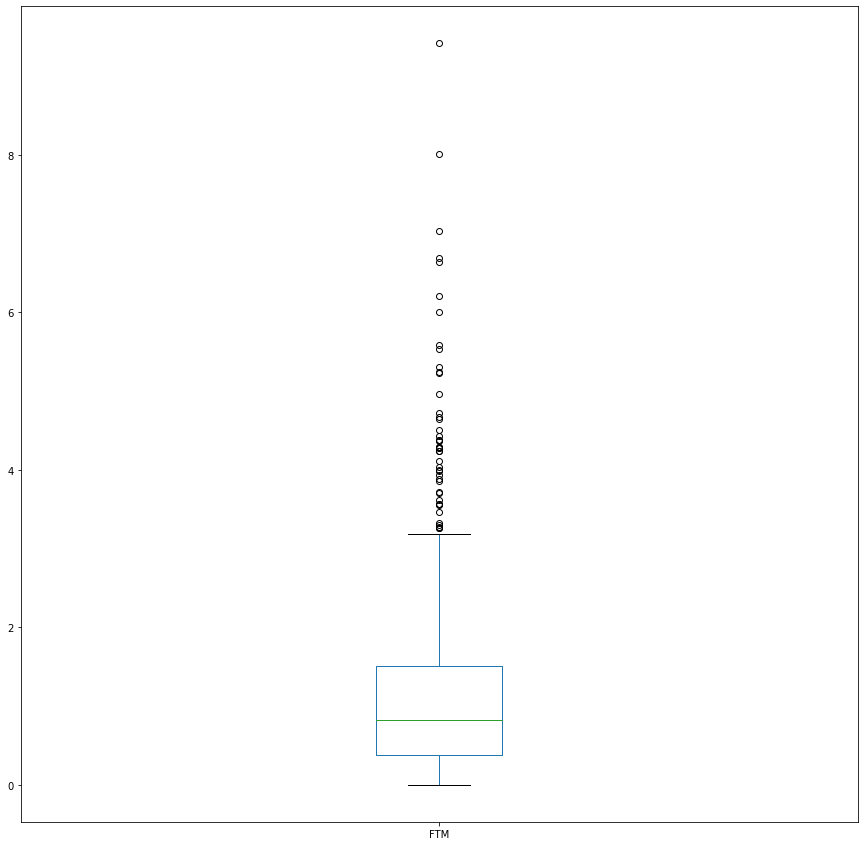

In [ ]:
EDA.plot.box(y = 'FTM', figsize = (15,15))

<AxesSubplot:>

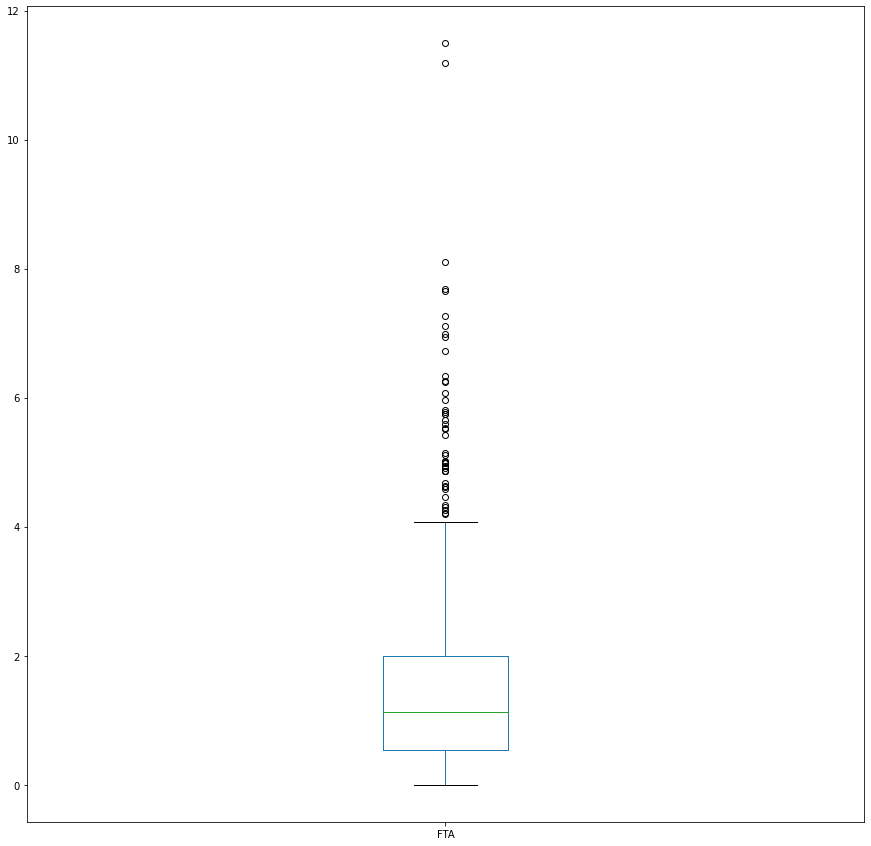

In [ ]:
EDA.plot.box(y = 'FTA', figsize = (15,15))

<AxesSubplot:>

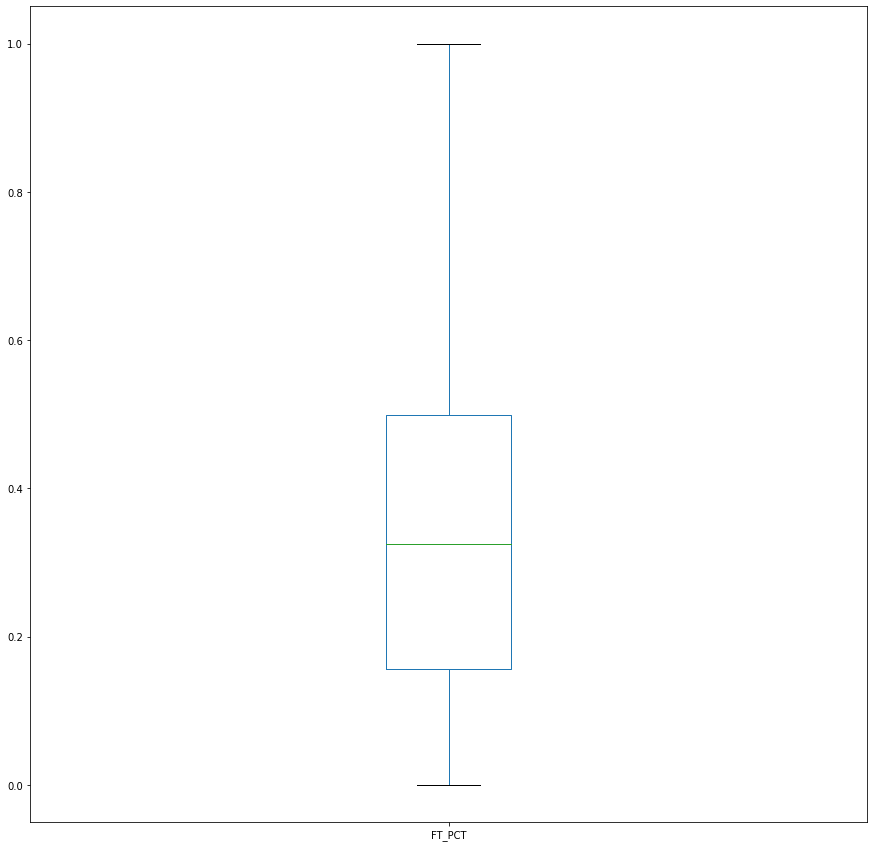

In [ ]:
EDA.plot.box(y = 'FT_PCT', figsize = (15,15))

<AxesSubplot:>

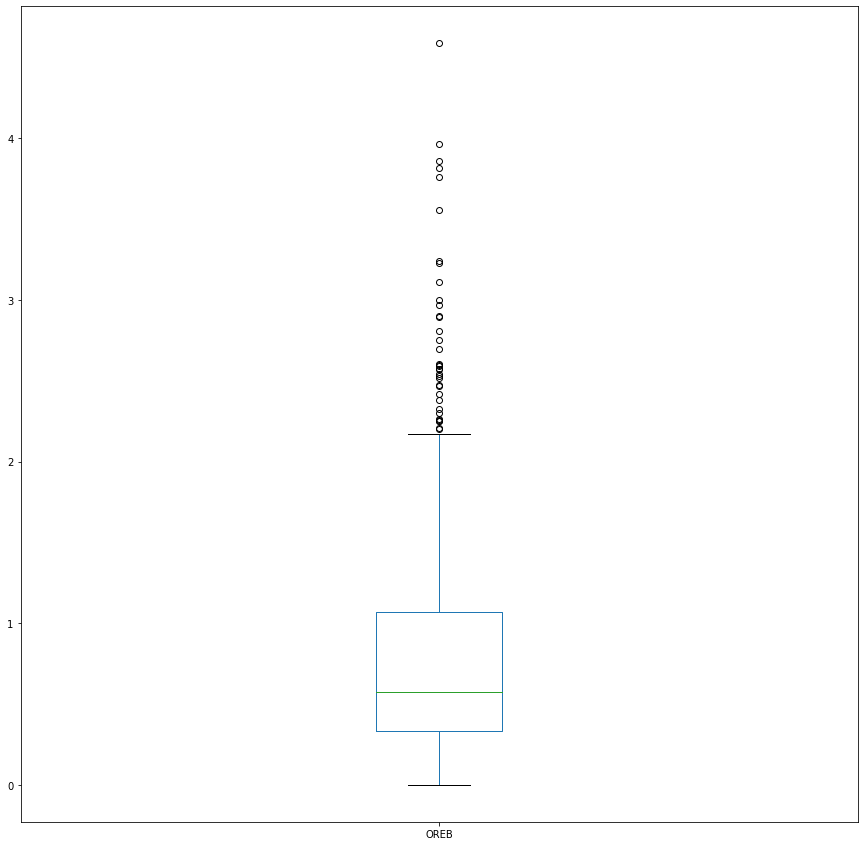

In [ ]:
EDA.plot.box(y = 'OREB', figsize = (15,15))

<AxesSubplot:>

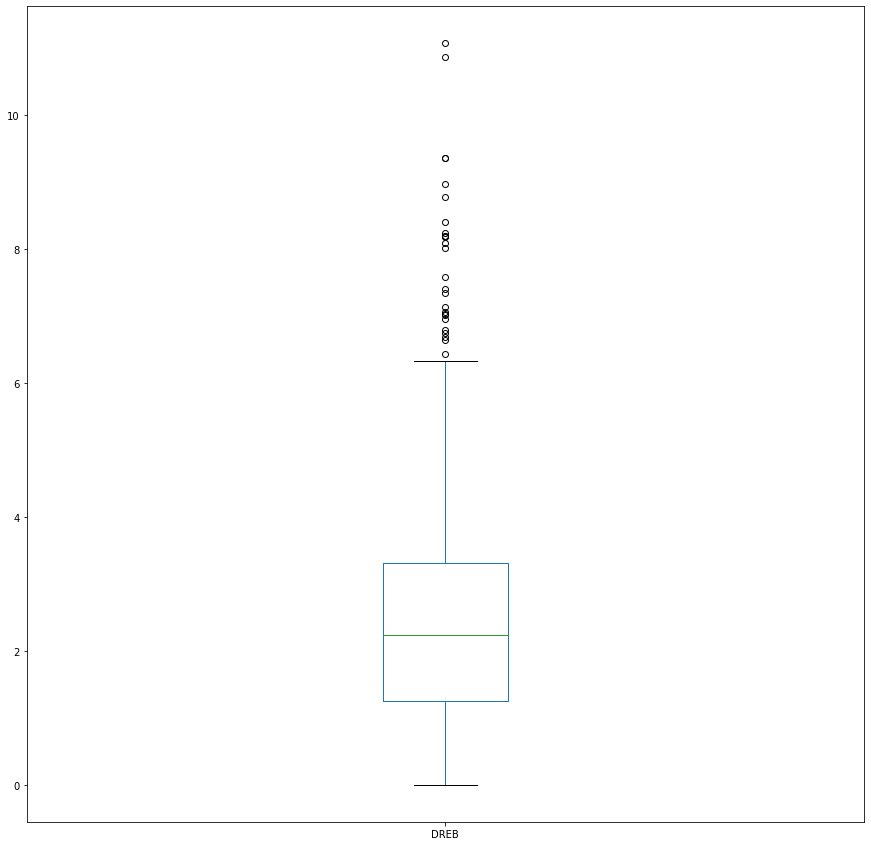

In [ ]:
EDA.plot.box(y = 'DREB', figsize = (15,15))

<AxesSubplot:>

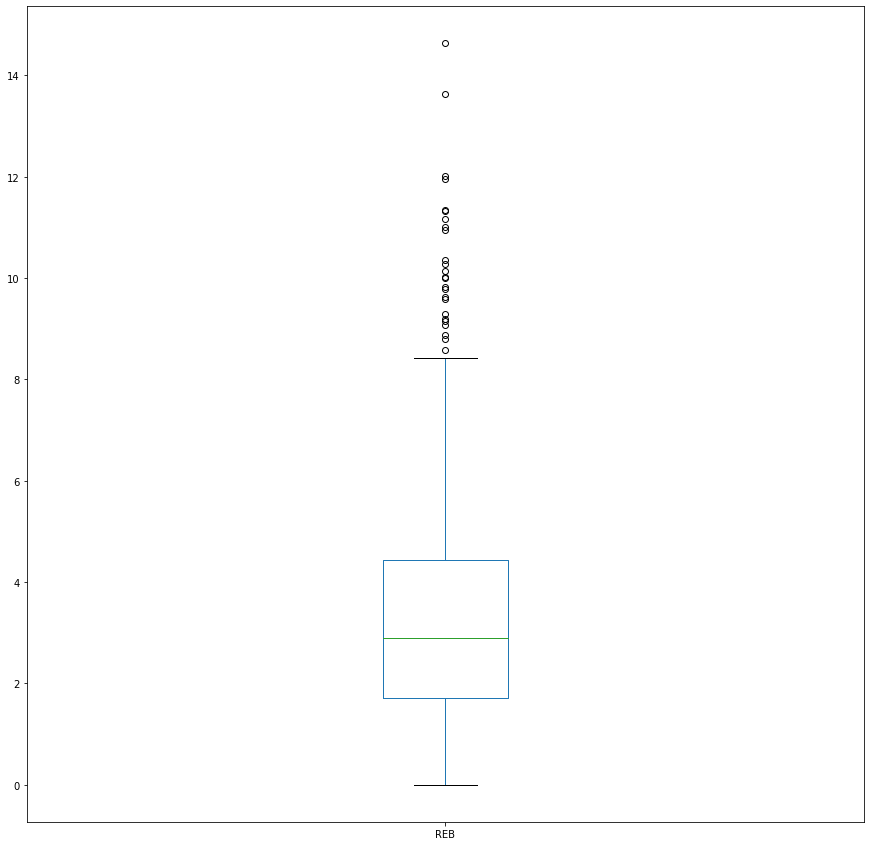

In [ ]:
EDA.plot.box(y = 'REB', figsize = (15,15))

<AxesSubplot:>

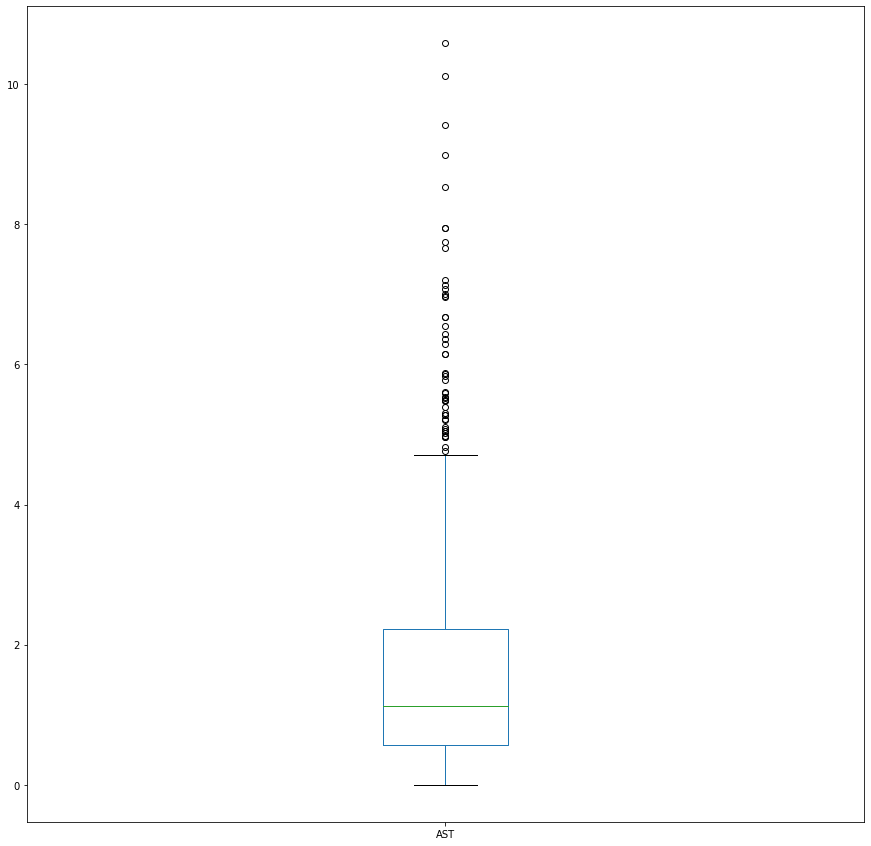

In [ ]:
EDA.plot.box(y = 'AST', figsize = (15,15))

<AxesSubplot:>

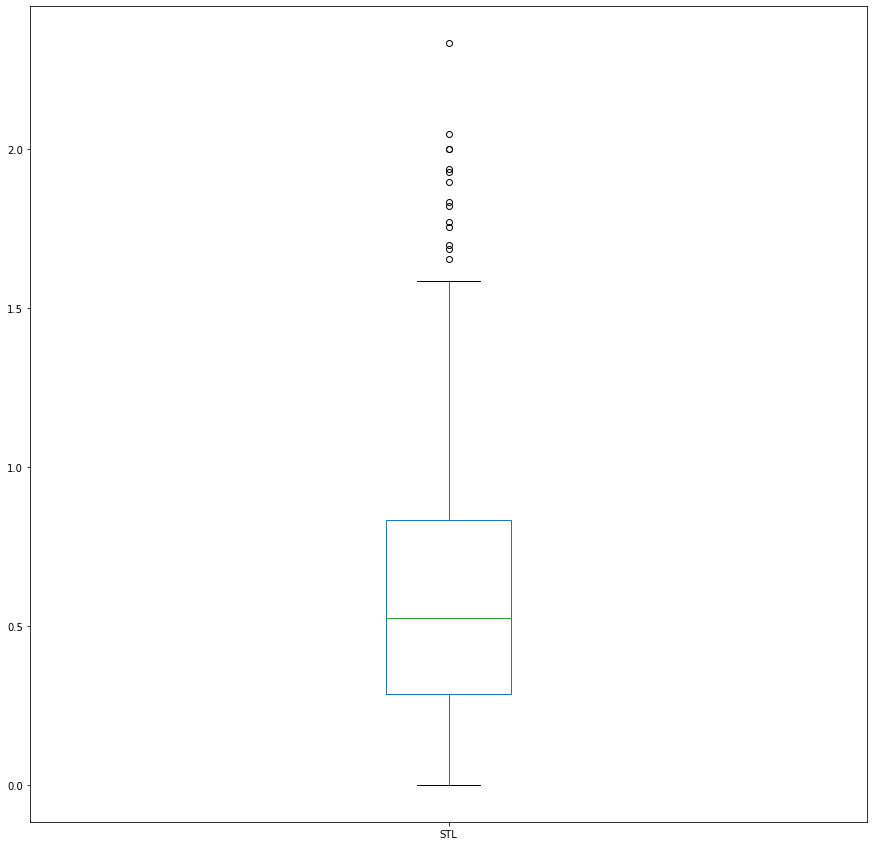

In [ ]:
EDA.plot.box(y = 'STL', figsize = (15,15))

<AxesSubplot:>

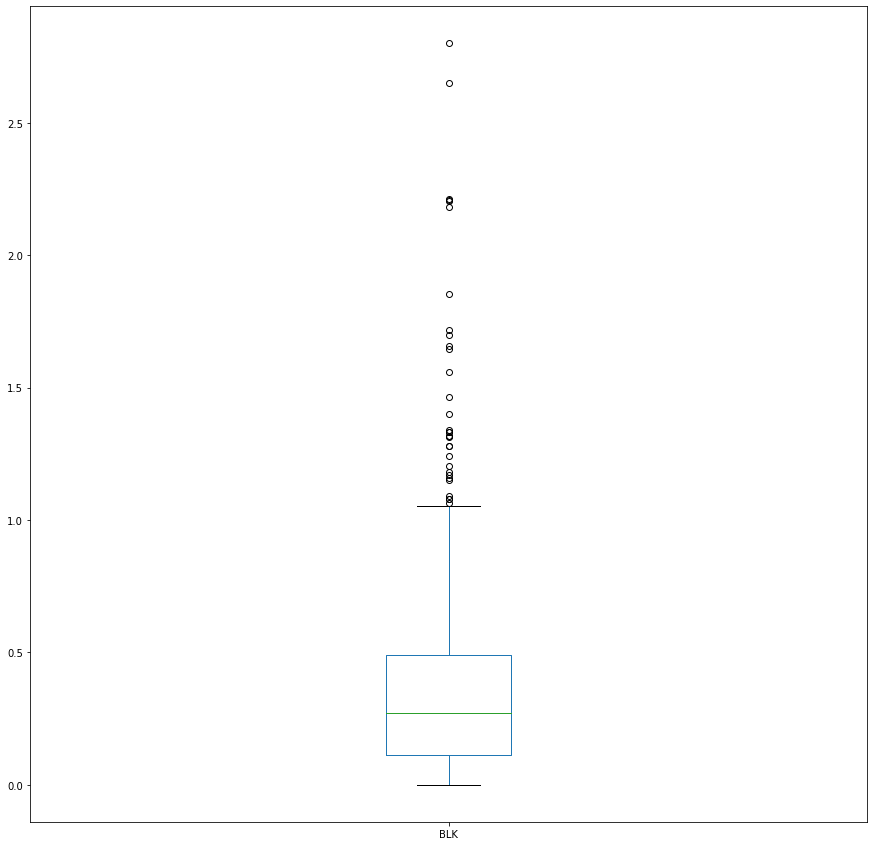

In [ ]:
EDA.plot.box(y = 'BLK', figsize = (15,15))

<AxesSubplot:>

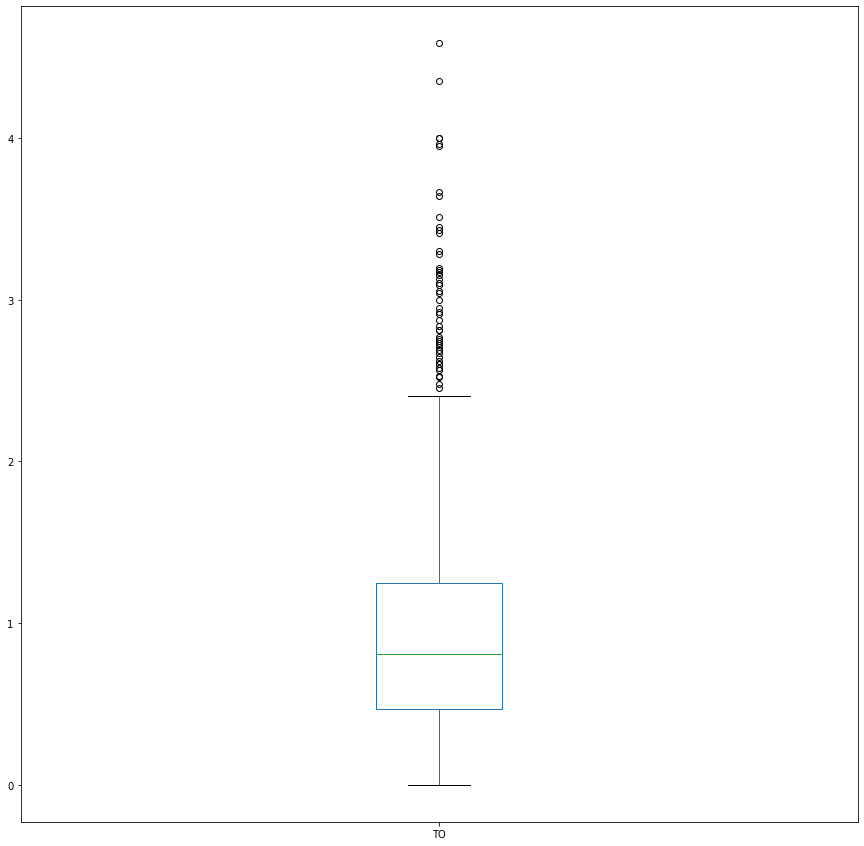

In [ ]:
EDA.plot.box(y = 'TO', figsize = (15,15))

<AxesSubplot:>

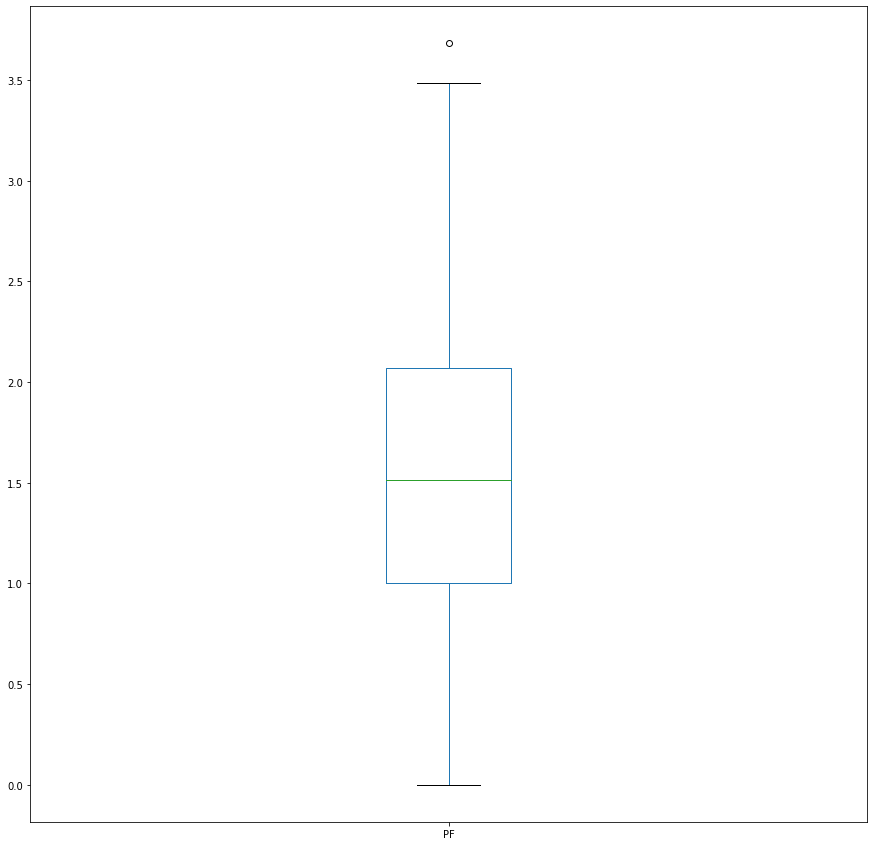

In [ ]:
EDA.plot.box(y = 'PF', figsize = (15,15))

<AxesSubplot:>

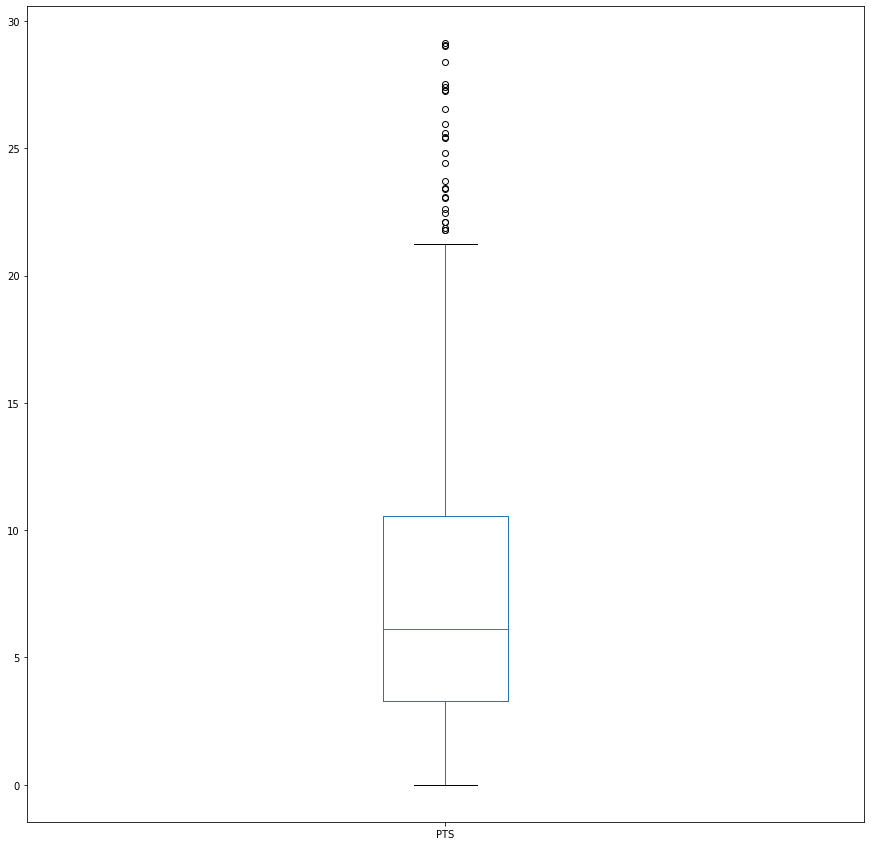

In [ ]:
EDA.plot.box(y = 'PTS', figsize = (15,15))

<AxesSubplot:>

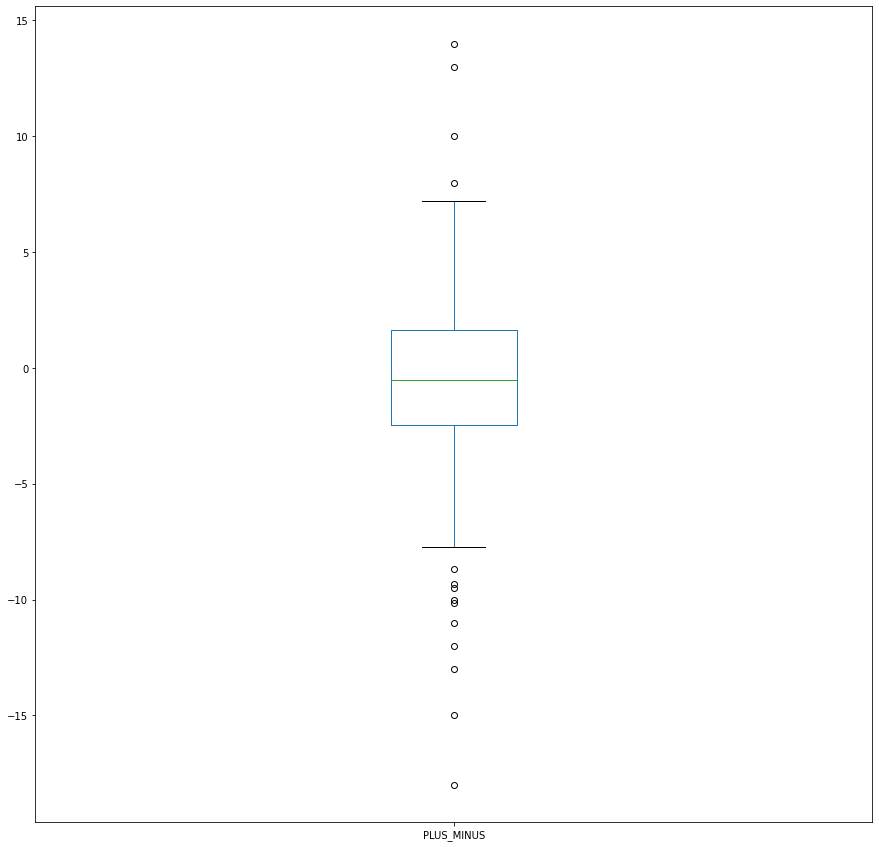

In [ ]:
EDA.plot.box(y = 'PLUS_MINUS', figsize = (15,15))

### Observations

- `FGM`, `FG3M`, `FTM`, `FTA`, `OREB`, `DREB`, `REB`, `AST`, `STL`, `BLK`, `TO` and `PTS` have a lot of upper outliers 
- Upper outliers may signify those who perform well in terms of that feature and might be correlated with being nominated for MVP
- `PLUS_MINUS` has both upper and lower outliers. Upper outliers may be correlated with being nominated for MVP.
- Most nominees seems to be within the upper outliers
- Most of the players are within the IQR (Interquartile Range)

# Initial Model Training &amp; Testing

## Training &amp; Test 

Here we split the data intro our training and test sets for the different models to learn. A 70%-30% training-testing scheme was used to divide the data with the seasons 2004 to 2015 as the training set and seasons 2016-2021 as the testing set.

In [ ]:
training = four.append(five)
training = training.append(six)
training = training.append(seven)
training = training.append(eight)
training = training.append(nine)
training = training.append(ten)
training = training.append(eleven)
training = training.append(twelve)
training = training.append(thirteen)
training = training.append(fourteen)
training = training.append(fifteen)

training


testing = sixteen.append(seventeen)
testing = testing.append(eighteen)
testing = testing.append(nineteen)
testing = testing.append(twenty)
testing = testing.append(twentyone)

testing

X_train = training.drop(columns = ['isNominated'])
y_train = training['isNominated']

print(X_train.head())
print(y_train.head())

X_test = testing.drop(columns = ['isNominated'])
y_test = testing['isNominated']

print(X_test.head())
print(y_test.head())

allX = X_train.append(X_test)
allY = y_train.append(y_test)

                           MIN       FGM    FG_PCT      FG3M      FG3A  \
PLAYER_NAME                                                              
Aaron McKie 2004     16.027397  0.876712  0.291753  0.287671  0.890411   
Aaron Williams 2004   6.857143  0.690476  0.315071  0.000000  0.000000   
Adonal Foyle 2004    21.256410  2.000000  0.412244  0.000000  0.000000   
Adrian Griffin 2004   9.540541  0.986486  0.235541  0.027027  0.121622   
Al Harrington 2004   38.121212  6.863636  0.453318  0.242424  1.121212   

                          FTM       FTA    FT_PCT      OREB      DREB  \
PLAYER_NAME                                                             
Aaron McKie 2004     0.136986  0.219178  0.061644  0.287671  2.232877   
Aaron Williams 2004  0.357143  0.404762  0.190476  0.404762  1.023810   
Adonal Foyle 2004    0.512821  0.923077  0.230923  2.115385  3.384615   
Adrian Griffin 2004  0.500000  0.662162  0.243243  0.770270  1.472973   
Al Harrington 2004   3.575758  5.318182  0.

## Training Base Classifiers

We experimented on using different base models to see which one would perform with the best accuracy with the use of the F1 score.

**Classification** models were chosen because our problem was classification and not regression.
- **Gaussian Naive Bayes** was chosen because Naive Bayes is one of the easiest classification model to train. This served as our basis for the performance of our other models
- **KNeighbors Classifier** was chosen because we figured that nominated players would have similar scores with other nominated players making the model fit for our problem
- **SGD Classifier** we wanted to test linear classifiers and SGD works well with large scale problems
- **Decision Trees** and **Random Forest Classifier** these models were chosen because we figured learning through decisions might be fit for our problem. We included both decision trees and random forest because decision trees tend to overfit. Random forest will allow us to get the best prediction because not all players who are voted for MVP excel at all aspects.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier


clfs = [
    KNeighborsClassifier(n_neighbors=5), 
    SGDClassifier(),
    GaussianNB(),
    svm.SVC(kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

results = {}
for clf in clfs:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  results[('Training', str(clf))] = {
      'Accuracy': accuracy_score(y_train, y_pred),
      'F1 score': f1_score(y_train, y_pred, average='binary')  
  }

pd.DataFrame(results).T

Accuracy  F1 score
Training KNeighborsClassifier()    0.979588  0.592334
         SGDClassifier()           0.973133  0.197917
         GaussianNB()              0.871075  0.298196
         SVC()                     0.974355  0.322581
         DecisionTreeClassifier()  1.000000  1.000000
         RandomForestClassifier()  1.000000  1.000000

## Testing Base Classifiers

We test the trained base models on our test data

In [ ]:
results = {}
for clf in clfs:
  y_pred = clf.predict(X_test)
  #print(pd.DataFrame(y_pred))
  x = X_test.reset_index()
  names = pd.concat([x, pd.DataFrame(y_pred)], axis = 1)
  print(names.loc[names[0] == True])
  #print(names)
  results[('Testing', str(clf))] = {
      'Accuracy': accuracy_score(y_test, y_pred),
      'F1 score': f1_score(y_test, y_pred, average='binary') 
  }

pd.DataFrame(results).T

                     PLAYER_NAME        MIN        FGM    FG_PCT      FG3M  \
44            Blake Griffin 2016  32.681159   7.753623  0.495101  0.652174   
89               Chris Paul 2016  30.986301   6.178082  0.463082  1.945205   
231            James Harden 2016  35.567010   8.164948  0.439175  3.123711   
305           Kawhi Leonard 2016  32.659341   8.406593  0.492549  1.978022   
315            Kevin Durant 2016  32.595238   8.928571  0.538988  2.071429   
342            LeBron James 2016  37.378947  10.210526  0.560011  1.778947   
474       Russell Westbrook 2016  33.777778  10.077778  0.422356  2.422222   
500           Stephen Curry 2016  32.601942   8.446602  0.471262  4.077670   
606           Anthony Davis 2017  35.659091  10.272727  0.529966  0.727273   
658              Chris Paul 2017  31.746667   6.533333  0.448867  2.466667   
770   Giannis Antetokounmpo 2017  36.214286   9.809524  0.531810  0.571429   
817            James Harden 2017  34.989247   8.967742  0.435290

Accuracy  F1 score
Testing KNeighborsClassifier()    0.983849  0.553846
        SGDClassifier()           0.986355  0.514851
        GaussianNB()              0.891117  0.258065
        SVC()                     0.986076  0.590164
        DecisionTreeClassifier()  0.960178  0.341014
        RandomForestClassifier()  0.983849  0.546875

# Hyperparameter Tuning

Here we are fine tuning the models to see which parameters will help increase the F1 score which will help determine which is our best model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import numpy as np

In [ ]:
clf = SGDClassifier()

hyperparameters = [
     {
     'alpha': [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9],
     'penalty': ['l2','l1','elasticnet'],
     'n_jobs': [-1],
     'eta0':[0,1,10,100],
     'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
     'max_iter':[1000, 2000],
     'learning_rate':['constant','optimal', 'invscaling', 'adaptive']
     }
 ]

SGD = GridSearchCV(param_grid= hyperparameters,estimator=clf,cv = 5, scoring='f1')
SGD.fit(X_train, y_train)

SGD.best_params_

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/shared-libs/pyt

{'alpha': 1e-09,
 'eta0': 10,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_jobs': -1,
 'penalty': 'l1'}

In [ ]:

clf = GaussianNB()

hyperparameters = {'var_smoothing': np.logspace(0,-9, num=100)}
GNB = GridSearchCV(estimator=clf, 
                 param_grid=hyperparameters, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='f1') 
GNB.fit(X_train, y_train)

GNB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.2848035868435802}

In [ ]:
clf = KNeighborsClassifier()

hyperparameters = [
     {
     'n_neighbors': [1, 3, 5, 10, 20, 50, 100],
     'weights': ['uniform', 'distance'],
     'leaf_size': [10, 30, 50, 100],
     'p': [1, 2],
     'n_jobs': [-1]
     }
 ]

KNN = GridSearchCV(param_grid= hyperparameters,estimator=clf,cv = 5, scoring='f1')
KNN.fit(X_train, y_train)

KNN.best_params_

{'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [ ]:
clf = svm.SVC()

hyperparameters = [
     {
     'C': [0.1, 1, 10, 100, 1000],
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf', 'poly', 'sigmoid']
     }
 ]

SVM = RandomizedSearchCV(param_distributions= hyperparameters,estimator=clf,cv = 5, scoring='f1', n_iter = 10, n_jobs = -1)
SVM.fit(X_train, y_train)

SVM.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [ ]:
clf = RandomForestClassifier()

hyperparameters = [
     {'bootstrap': [True, False],
      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
 ]

RFC = RandomizedSearchCV(param_distributions= hyperparameters,estimator=clf,cv = 5, scoring='f1', n_iter = 30, n_jobs = -1)
RFC.fit(X_train, y_train)

RFC.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
clf = DecisionTreeClassifier()

hyperparameters = [
     {
     "criterion": ["gini", "entropy", "log_loss"],
     "max_depth": [5, 10, 20, 30, 50, None],
     "min_samples_split": [2, 4, 6, 10, 15, 20, 50, None],
     "max_leaf_nodes": [3, 5, 10, 20, 50, 100, 200, None]
     }
 ]

DTC = GridSearchCV(param_grid= hyperparameters,estimator=clf,cv = 5, scoring='f1')
DTC.fit(X_train, y_train)

DTC.best_params_

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 273, in fit
    check_scalar(
  File "/shared-libs/python3.9/py/lib

{'criterion': 'gini',
 'max_depth': 50,
 'max_leaf_nodes': 20,
 'min_samples_split': 15}

# Training and Testing with best parameters

Here we test again the models with the new chosen parameters.

In [ ]:
clfs = [
    KNeighborsClassifier(leaf_size= 10, n_jobs= -1, n_neighbors= 3, p= 1, weights= 'uniform'),
    SGDClassifier( alpha= 1e-09, eta0 = 10, learning_rate = 'optimal', loss = 'hinge', max_iter = 1000, n_jobs = -1, penalty = 'l1'),
    GaussianNB(var_smoothing= 0.2848035868435802),
    svm.SVC(kernel='rbf', C = 10, gamma = 0.01),
    DecisionTreeClassifier(criterion = 'gini', max_depth = 50, max_leaf_nodes = 20, min_samples_split = 15),
    RandomForestClassifier(n_estimators = 1600, min_samples_split = 2, max_depth = 60, min_samples_leaf = 2, bootstrap = False)
]

results = {}
for clf in clfs:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  results[('Training', str(clf))] = {
      'Accuracy': accuracy_score(y_train, y_pred),
      'F1 score': f1_score(y_train, y_pred, average='binary') 
  }

pd.DataFrame(results).T

Accuracy  \
Training KNeighborsClassifier(leaf_size=10, n_jobs=-1, n...  0.983252   
         SGDClassifier(alpha=1e-09, eta0=10, n_jobs=-1, ...  0.971389   
         GaussianNB(var_smoothing=0.2848035868435802)        0.958479   
         SVC(C=10, gamma=0.01)                               0.982380   
         DecisionTreeClassifier(max_depth=50, max_leaf_n...  0.983775   
         RandomForestClassifier(bootstrap=False, max_dep...  1.000000   

                                                             F1 score  
Training KNeighborsClassifier(leaf_size=10, n_jobs=-1, n...  0.684211  
         SGDClassifier(alpha=1e-09, eta0=10, n_jobs=-1, ...  0.154639  
         GaussianNB(var_smoothing=0.2848035868435802)        0.482609  
         SVC(C=10, gamma=0.01)                               0.643110  
         DecisionTreeClassifier(max_depth=50, max_leaf_n...  0.699029  
         RandomForestClassifier(bootstrap=False, max_dep...  1.000000

After finding the best parameters for each model, we ran an accuracy test to see if there were any improvements from the initial scores. As a result, the Random Forest Classifier gave the highest score among the different models used.

In [ ]:
results = {}
for clf in clfs:
  y_pred = clf.predict(X_test)
  #print(pd.DataFrame(y_pred))
  x = X_test.reset_index()
  names = pd.concat([x, pd.DataFrame(y_pred)], axis = 1)
  print(names.loc[names[0] == True])
  #print(names)
  results[('Testing', str(clf))] = {
      'Accuracy': accuracy_score(y_test, y_pred),
      'F1 score': f1_score(y_test, y_pred, average='binary') 
  }

pd.DataFrame(results).T

                     PLAYER_NAME        MIN        FGM    FG_PCT      FG3M  \
26           Andrew Wiggins 2016  36.290698   8.476744  0.441291  1.209302   
44            Blake Griffin 2016  32.681159   7.753623  0.495101  0.652174   
89               Chris Paul 2016  30.986301   6.178082  0.463082  1.945205   
231            James Harden 2016  35.567010   8.164948  0.439175  3.123711   
305           Kawhi Leonard 2016  32.659341   8.406593  0.492549  1.978022   
315            Kevin Durant 2016  32.595238   8.928571  0.538988  2.071429   
342            LeBron James 2016  37.378947  10.210526  0.560011  1.778947   
474       Russell Westbrook 2016  33.777778  10.077778  0.422356  2.422222   
500           Stephen Curry 2016  32.601942   8.446602  0.471262  4.077670   
658              Chris Paul 2017  31.746667   6.533333  0.448867  2.466667   
700           DeMar DeRozan 2017  33.223404   7.978723  0.449564  1.074468   
770   Giannis Antetokounmpo 2017  36.214286   9.809524  0.531810

Accuracy  F1 score
Testing KNeighborsClassifier(leaf_size=10, n_jobs=-1, n...  0.982456  0.511628
        SGDClassifier(alpha=1e-09, eta0=10, n_jobs=-1, ...  0.979114  0.452555
        GaussianNB(var_smoothing=0.2848035868435802)        0.965191  0.468085
        SVC(C=10, gamma=0.01)                               0.982178  0.515152
        DecisionTreeClassifier(max_depth=50, max_leaf_n...  0.976330  0.429530
        RandomForestClassifier(bootstrap=False, max_dep...  0.983849  0.546875

There is a fairly significant increase between the F1 scores of the base classifiers and the tuned models.

From the results of our tuning, Random Forest Classifier had the best accuracy and F1 score compared to the other models we had.

# Predicting Based on User Input

We have included this section to allow you to interact with our model.

You will be asked to input a series of details about a player (specifically their **performance metrics**), and the model will try to predict whether your given player is likely to be **nominated** or **not**.

This model will be utilizing the **Random Forest Classifier**, as it has achieved the highest **F-score** out of all of our options.

In [ ]:
bestmodel = RandomForestClassifier(n_estimators = 1600, min_samples_split = 5, max_depth = 100, bootstrap = False)
bestmodel.fit(allX, allY)

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_split=5,
                       n_estimators=1600)

In [ ]:
#Run this block to predict

name = input("Input Name of Player: ")
MIN = float(input("Input Average MIN of Player: "))
FGM = float(input("Input Average FGM of Player: "))
FG_PCT = float(input("Input Average FG_PCT of Player: "))
FG3M = float(input("Input Average FG3M of Player: "))
FG3A = float(input("Input Average FG3A of Player: "))
FTM = float(input("Input Average FTM of Player: "))
FTA = float(input("Input Average FTA of Player: "))
FT_PCT = float(input("Input Average FT_PCT of Player: "))
OREB = float(input("Input Average OREB of Player: "))
DREB = float(input("Input Average DREB of Player: "))
REB = float(input("Input Average REB of Player: "))
AST = float(input("Input Average AST of Player: "))
STL = float(input("Input Average STL of Player: "))
BLK = float(input("Input Average BLK of Player: "))
TO = float(input("Input Average TO of Player: "))
PF = float(input("Input Average PF of Player: "))
PTS = float(input("Input Average PTS of Player: "))
PLUS_MINUS = float(input("Input Average PLUS_MINUS of Player: "))


INPUT = [[MIN, FGM, FG_PCT, FG3M, FG3A, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, STL, BLK, TO, PF, PTS, PLUS_MINUS]]
print(INPUT)
results = bestmodel.predict(INPUT)

if results[0]:
    print(name + " is nominated")

else:
    print(name + " is not nominated")


ValueError: could not convert string to float: ''

# Insights and Conclusions

- In some way, machine learning is able to “mimic” human judgement and behavior, depending on how the aforementioned relies on the same statistics and metrics that the model is subjected to.
- There is no one singular approach to machine learning; it all depends on the context and nature of the data. This involves evaluating multiple models and comparing them with relevant metrics.
- It is important to find patterns and correlations between the data and the labels. The relationships between these elements are what fuels the learning process in machine learning.
- Regarding the results of our machine learning model, the predictions of NBA players to be nominated were more or less accurate as the finalists for each season, the top 3 players up for the award, are present in the list. With this, our model can't really predict the nominees in the middle of an NBA season, as there are many outliers that could affect the players who could be part of the list. Instead, it can be used to show who are currently excelling the league at a certain time, which of of course is not as prestigious as the MVP award. 
- It is also worth mentioning that during the initial testing of the data, the accuracy scores of the models used were very high sitting at the 90% range. This was due to the data being very skewed and making the F1 score a better metric for predictive performance.
- In the results of some models, there have been players who have been predicted to be nominated but in fact are false positives. This is because in the actual voting process, the judges do not solely rely on who has the best stats, but also may rely on their personal biases.
- Preprocessing is *very* important; it might be more important than some of the steps in some cases. The verity of the entire machine learning process is dependent on the form of the data presented to it.
- Patience is key (especially in hyperparameter tuning).
- Machine learning is both important *and* fun as it can provide predicitive insights of our common interests such as the main topic of this notebook, the NBA.

## Recommendations

We recommend the following insights to further investigate more on the features of this project
- To conduct feature oblation
- To use other ensemble models
- Try to combine or lessen the features/columns of the NBA players to find whether there are correlations of these columns to them being predicted to be nominated. It is also worth mentioning trying to add new features of the players since the model still does not predict perfectly.


## References

1. `https://www.knowledgehut.com/tutorials/machine-learning/hyperparameter-tuning-machine-learninghttps://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb`

2. `https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f`

3. `https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/`

4. `https://gist.github.com/statcompute/d97c42361a0a84e4ade02ed3fe667ca5https://www.section.io/engineering-education/hyperparmeter-tuning/`

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee865f3a-7d85-4ca2-859b-b651767a71d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>